In [4]:
from garminconnect import (
    Garmin,
    GarminConnectConnectionError,
    GarminConnectTooManyRequestsError,
    GarminConnectAuthenticationError
)
import pandas as pd
from datetime import datetime

class GarminConnection:
    def __init__(self, email=None, password=None):
        self.email = email
        self.password = password
        self.client = None
        
    def conectar(self):
        """Conecta à API do Garmin Connect"""
        try:
            self.client = Garmin(self.email, self.password)
            self.client.login()
            print("✅ Conectado ao Garmin Connect!")
            return True
            
        except GarminConnectAuthenticationError:
            print("❌ Erro de autenticação. Verifique email e senha.")
            return False
        except GarminConnectTooManyRequestsError:
            print("❌ Muitas requisições. Tente novamente mais tarde.")
            return False
        except Exception as e:
            print(f"❌ Erro ao conectar: {str(e)}")
            return False
    
    def obter_atividades(self, limite=10):
        """Obtém as últimas atividades do usuário"""
        if not self.client:
            raise Exception("Não conectado ao Garmin Connect")
            
        try:
            atividades = self.client.get_activities(0, limite)
            print(f"✅ {len(atividades)} atividades obtidas")
            return atividades
            
        except Exception as e:
            print(f"❌ Erro ao obter atividades: {str(e)}")
            return []

def testar_garmin():
    email = "luisa-souto@hotmail.com"
    password = "Luisa.1620"
    
    conexao = GarminConnection(email, password)
    try:
        if conexao.conectar():
            print("✅ Conexão bem sucedida!")
            
            # Obtém atividades
            atividades = conexao.obter_atividades(limite=10)  # últimas 10 atividades
            
            if not atividades:
                print("Nenhuma atividade encontrada")
                return
            
            # Converte para DataFrame
            df = pd.DataFrame(atividades)
            
            # Formata as colunas de data
            df['startTimeLocal'] = pd.to_datetime(df['startTimeLocal'])
            
            # Seleciona colunas mais relevantes
            colunas_importantes = [
                'activityName',
                'startTimeLocal',
                'distance',  # em metros
                'duration',  # em segundos
                'averageSpeed',
                'averageHR',
                'maxHR',
                'calories'
            ]
            
            df_formatado = df[colunas_importantes].copy()
            
            # Adiciona colunas calculadas
            df_formatado['distancia_km'] = df_formatado['distance'] / 1000
            df_formatado['duracao_minutos'] = df_formatado['duration'] / 60
            df_formatado['pace_min_km'] = df_formatado['duracao_minutos'] / df_formatado['distancia_km']
            
            # Mostra o resultado
            print("\nResumo das atividades:")
            print(df_formatado.to_string())
            
            # Estatísticas básicas
            print("\nEstatísticas:")
            print(df_formatado[['distancia_km', 'duracao_minutos', 'averageHR', 'calories']].describe())
            
            # Salva em CSV (opcional)
            df_formatado.to_csv('atividades_garmin.csv', index=False)
            print("\n✅ Dados salvos em 'atividades_garmin.csv'")
            
            return df_formatado  # retorna o DataFrame para uso posterior
            
    except Exception as e:
        print(f"❌ Erro: {str(e)}")
        return None

if __name__ == "__main__":
    df = testar_garmin()

✅ Conectado ao Garmin Connect!
✅ Conexão bem sucedida!
✅ 10 atividades obtidas

Resumo das atividades:
          activityName      startTimeLocal      distance     duration  averageSpeed  averageHR  maxHR  calories  distancia_km  duracao_minutos  pace_min_km
0  Santa Luzia Corrida 2025-02-22 06:43:35  12011.830078  4892.215820         2.455      166.0  181.0     822.0      12.01183        81.536930     6.788052
1       Cardiovascular 2025-02-21 08:10:18      0.000000  3099.827881         0.000      136.0  164.0     376.0       0.00000        51.663798          inf
2   Corrida em esteira 2025-02-21 07:18:02   5128.220215  2450.604004         2.093      162.0  181.0     419.0       5.12822        40.843400     7.964440
3       Cardiovascular 2025-02-19 06:07:40      0.000000  3420.448975         0.000      117.0  163.0     284.0       0.00000        57.007483          inf
4   Santa Luzia - Base 2025-02-18 06:21:24   5557.240234  2257.000977         2.462      158.0  174.0     363.0      

✅ Conectado ao Garmin Connect!
✅ 30 atividades obtidas

=== ANÁLISE COMPLETA DAS SUAS CORRIDAS ===

1. ESTATÍSTICAS GERAIS
Total de corridas válidas: 19
Distância total: 115.5 km
Pace médio: 7.8 min/km

2. ANÁLISE POR DISTÂNCIA

5K:
Seu melhor pace: 6.7 min/km
Nível atual: ✨ Iniciante

10K:
Seu melhor pace: 6.5 min/km
Nível atual: ✨ Intermediário

3. CORRELAÇÕES E TENDÊNCIAS

Correlação entre variáveis:
              distancia_km  pace_min_km  averageHR  calories
distancia_km          1.00        -0.32       0.64      0.97
pace_min_km          -0.32         1.00      -0.67     -0.11
averageHR             0.64        -0.67       1.00      0.56
calories              0.97        -0.11       0.56      1.00

Tendência do seu pace: Você está piorando

4. ANÁLISE TEMPORAL
Melhor dia para corrida: Saturday
Melhor período do dia: Madrugada

5. CONSISTÊNCIA NOS TREINOS
Média de dias entre corridas: 0.9
Maior intervalo sem correr: 3 dias

6. DISTRIBUIÇÃO DOS TREINOS
Pace Normal: 47.4% dos treinos

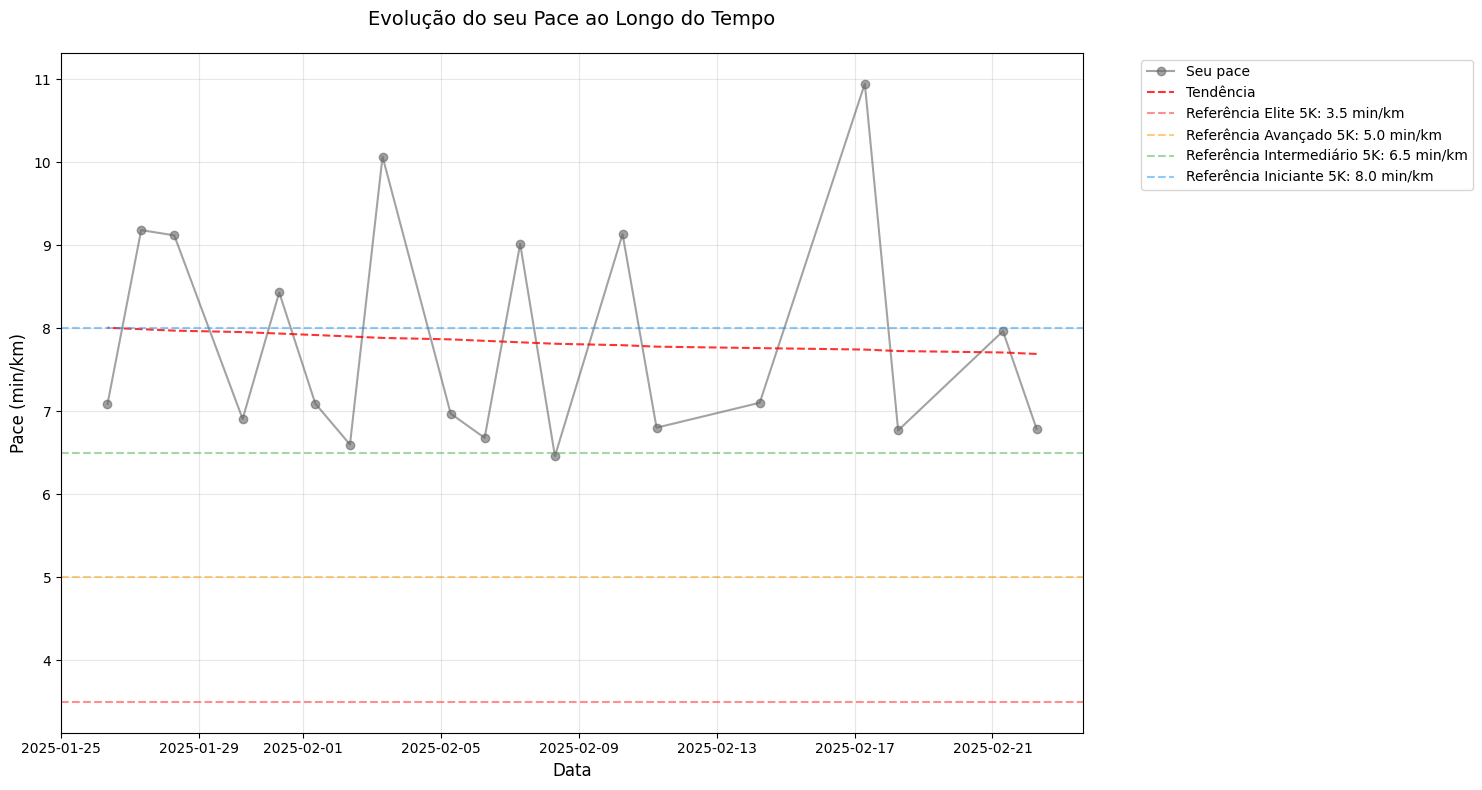


7. RECOMENDAÇÕES BASEADAS NOS DADOS

• Foco em Velocidade:
  - Inclua treinos intervalados 1-2x por semana
  - Faça um teste de 5K para avaliar progresso
  - Mantenha alguns treinos no pace atual para base

• Horários Ideais:
  - Priorize treinos no período da madrugada
  - Saturday apresenta seus melhores resultados

• Tipo de Treino:
  - Você tem melhor performance em distâncias maiores
  - Foque em treinos longos e progressivos
  - Inclua treinos específicos de velocidade para 5K

✅ Relatório detalhado salvo em 'analise_corridas_detalhada.txt'


In [13]:
from garminconnect import (
    Garmin,
    GarminConnectConnectionError,
    GarminConnectTooManyRequestsError,
    GarminConnectAuthenticationError
)
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Referências de pace para mulheres (min/km)
REFERENCIAS_PACE = {
    '5K': {
        'Elite': 3.5,
        'Avançado': 5.0,
        'Intermediário': 6.5,
        'Iniciante': 8.0
    },
    '10K': {
        'Elite': 3.7,
        'Avançado': 5.5,
        'Intermediário': 7.0,
        'Iniciante': 8.5
    },
    '21K': {
        'Elite': 4.0,
        'Avançado': 6.0,
        'Intermediário': 7.5,
        'Iniciante': 9.0
    }
}

# Paleta de cores para referências
CORES_REFERENCIAS = {
    'Elite': '#FF1E1E',       # Vermelho
    'Avançado': '#FF9A00',    # Laranja
    'Intermediário': '#4CAF50', # Verde
    'Iniciante': '#2196F3'     # Azul
}

class GarminConnection:
    def __init__(self, email=None, password=None):
        self.email = email
        self.password = password
        self.client = None
        
    def conectar(self):
        try:
            self.client = Garmin(self.email, self.password)
            self.client.login()
            print("✅ Conectado ao Garmin Connect!")
            return True
        except Exception as e:
            print(f"❌ Erro ao conectar: {str(e)}")
            return False
    
    def obter_atividades(self, limite=30):
        if not self.client:
            raise Exception("Não conectado ao Garmin Connect")
        try:
            atividades = self.client.get_activities(0, limite)
            print(f"✅ {len(atividades)} atividades obtidas")
            return atividades
        except Exception as e:
            print(f"❌ Erro ao obter atividades: {str(e)}")
            return []

def processar_dados(df):
    """Processa e limpa os dados do DataFrame"""
    # Criar cópia do DataFrame para evitar warnings
    df = df.copy()
    
    # Converte e calcula colunas básicas
    df['startTimeLocal'] = pd.to_datetime(df['startTimeLocal'])
    df['distancia_km'] = df['distance'] / 1000
    df['duracao_minutos'] = df['duration'] / 60
    df['pace_min_km'] = df.apply(
        lambda row: row['duracao_minutos'] / row['distancia_km'] 
        if row['distancia_km'] > 0 else 0, 
        axis=1
    )
    
    # Filtra corridas válidas
    df = df[
        (df['pace_min_km'] > 0) & 
        (df['pace_min_km'] < 15) &  # Remove paces irreais
        (df['distancia_km'] > 0)
    ].copy()  # Criar nova cópia após filtro
    
    # Adiciona colunas de análise temporal usando .loc
    df.loc[:, 'dia_semana'] = df['startTimeLocal'].dt.day_name()
    df.loc[:, 'hora_dia'] = df['startTimeLocal'].dt.hour
    df.loc[:, 'periodo'] = pd.cut(
        df['hora_dia'], 
        bins=[0, 6, 12, 18, 24],
        labels=['Madrugada', 'Manhã', 'Tarde', 'Noite']
    )
    
    # Categoriza as corridas
    def categorizar_pace(pace):
        if pace < np.percentile(df['pace_min_km'], 25):
            return 'Pace Rápido'
        elif pace < np.percentile(df['pace_min_km'], 75):
            return 'Pace Normal'
        else:
            return 'Pace Lento'
    
    df.loc[:, 'zona_pace'] = df['pace_min_km'].apply(categorizar_pace)
    
    return df

def criar_visualizacoes(df):
    """Cria todas as visualizações da análise"""
    # Configurações gerais
    plt.style.use('default')
    
    # 1. Evolução do Pace com Tendência
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Plotar dados
    ax.plot(df['startTimeLocal'], df['pace_min_km'], 'o-', 
            color='#666666', alpha=0.6, label='Seu pace')
    
    # Adicionar linha de tendência
    x = np.arange(len(df))
    z = np.polyfit(x, df['pace_min_km'], 1)
    p = np.poly1d(z)
    ax.plot(df['startTimeLocal'], p(x), '--', color='red', 
            alpha=0.8, label='Tendência')
    
    # Adicionar linhas de referência
    for nivel, pace in REFERENCIAS_PACE['5K'].items():
        ax.axhline(y=pace, linestyle='--', alpha=0.5,
                  color=CORES_REFERENCIAS[nivel],
                  label=f'Referência {nivel} 5K: {pace} min/km')
    
    # Configurar gráfico
    ax.set_title('Evolução do seu Pace ao Longo do Tempo', 
                 fontsize=14, pad=20)
    ax.set_xlabel('Data', fontsize=12)
    ax.set_ylabel('Pace (min/km)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
def analisar_corridas():
    email = "luisa-souto@hotmail.com"
    password = "Luisa.1620"
    
    conexao = GarminConnection(email, password)
    try:
        if conexao.conectar():
            atividades = conexao.obter_atividades(limite=30)
            
            if not atividades:
                print("Nenhuma atividade encontrada")
                return None
            
            # Criar DataFrame e processar dados
            df = pd.DataFrame(atividades)
            df = df.copy()  # Criar cópia explícita
            
            # Processamento básico
            df['startTimeLocal'] = pd.to_datetime(df['startTimeLocal'])
            df['distancia_km'] = df['distance'] / 1000
            df['duracao_minutos'] = df['duration'] / 60
            df['pace_min_km'] = df.apply(
                lambda row: row['duracao_minutos'] / row['distancia_km'] 
                if row['distancia_km'] > 0 else 0, 
                axis=1
            )
            
            # Filtrar corridas válidas
            df = df[
                (df['pace_min_km'] > 0) & 
                (df['pace_min_km'] < 15) &  # Remove paces irreais
                (df['distancia_km'] > 0)
            ].copy()
            
            # Análise temporal
            df.loc[:, 'dia_semana'] = df['startTimeLocal'].dt.day_name()
            df.loc[:, 'hora_dia'] = df['startTimeLocal'].dt.hour
            df.loc[:, 'periodo'] = pd.cut(
                df['hora_dia'], 
                bins=[0, 6, 12, 18, 24],
                labels=['Madrugada', 'Manhã', 'Tarde', 'Noite']
            )
            
            print("\n=== ANÁLISE COMPLETA DAS SUAS CORRIDAS ===")
            
            # 1. Estatísticas Gerais
            print("\n1. ESTATÍSTICAS GERAIS")
            print(f"Total de corridas válidas: {len(df)}")
            print(f"Distância total: {df['distancia_km'].sum():.1f} km")
            print(f"Pace médio: {df['pace_min_km'].mean():.1f} min/km")
            
            # 2. Análise por Distância
            print("\n2. ANÁLISE POR DISTÂNCIA")
            for dist, refs in REFERENCIAS_PACE.items():
                if dist == '5K':
                    corridas_dist = df[df['distancia_km'].between(4.5, 5.5)]
                elif dist == '10K':
                    corridas_dist = df[df['distancia_km'].between(9.5, 10.5)]
                elif dist == '21K':
                    corridas_dist = df[df['distancia_km'].between(20, 21.5)]
                
                if len(corridas_dist) > 0:
                    melhor_pace = corridas_dist['pace_min_km'].min()
                    print(f"\n{dist}:")
                    print(f"Seu melhor pace: {melhor_pace:.1f} min/km")
                    print("Nível atual:", end=" ")
                    for nivel, pace_ref in refs.items():
                        if melhor_pace <= pace_ref:
                            print(f"✨ {nivel}")
                            break
            
            # 3. Correlações e Tendências
            correlacao = df[['distancia_km', 'pace_min_km', 'averageHR', 'calories']].corr()
            print("\n3. CORRELAÇÕES E TENDÊNCIAS")
            print("\nCorrelação entre variáveis:")
            print(correlacao.round(2))
            
            # Calcular tendência do pace
            x = range(len(df))
            tendencia_pace = np.polyfit(x, df['pace_min_km'], 1)
            tendencia = "melhorando" if tendencia_pace[0] < 0 else "piorando"
            print(f"\nTendência do seu pace: Você está {tendencia}")
            
            # 4. Análise Temporal
            pace_por_dia = df.groupby('dia_semana', observed=True)['pace_min_km'].mean()
            melhor_dia = pace_por_dia.idxmin()
            
            pace_por_periodo = df.groupby('periodo', observed=True)['pace_min_km'].mean()
            melhor_periodo = pace_por_periodo.idxmin()
            
            print("\n4. ANÁLISE TEMPORAL")
            print(f"Melhor dia para corrida: {melhor_dia}")
            print(f"Melhor período do dia: {melhor_periodo}")
            
            # 5. Consistência
            dias_entre_corridas = df['startTimeLocal'].sort_values().diff().dt.days.dropna()
            print("\n5. CONSISTÊNCIA NOS TREINOS")
            print(f"Média de dias entre corridas: {dias_entre_corridas.mean():.1f}")
            print(f"Maior intervalo sem correr: {dias_entre_corridas.max():.0f} dias")
            
            # 6. Distribuição dos Treinos
            df.loc[:, 'zona_pace'] = pd.cut(
                df['pace_min_km'],
                bins=[0, df['pace_min_km'].quantile(0.25),
                      df['pace_min_km'].quantile(0.75), float('inf')],
                labels=['Pace Rápido', 'Pace Normal', 'Pace Lento']
            )
            
            distribuicao_zonas = df['zona_pace'].value_counts()
            print("\n6. DISTRIBUIÇÃO DOS TREINOS")
            for zona, count in distribuicao_zonas.items():
                percentual = (count/len(df))*100
                print(f"{zona}: {percentual:.1f}% dos treinos")
            
            # 7. Visualizações
            criar_visualizacoes(df)
            
            # 8. Recomendações
            print("\n7. RECOMENDAÇÕES BASEADAS NOS DADOS")
            
            if tendencia == "piorando":
                print("\n• Foco em Velocidade:")
                print("  - Inclua treinos intervalados 1-2x por semana")
                print("  - Faça um teste de 5K para avaliar progresso")
                print("  - Mantenha alguns treinos no pace atual para base")
            
            print(f"\n• Horários Ideais:")
            print(f"  - Priorize treinos no período da {melhor_periodo.lower()}")
            print(f"  - {melhor_dia} apresenta seus melhores resultados")
            
            if correlacao.loc['distancia_km', 'pace_min_km'] < 0:
                print("\n• Tipo de Treino:")
                print("  - Você tem melhor performance em distâncias maiores")
                print("  - Foque em treinos longos e progressivos")
                print("  - Inclua treinos específicos de velocidade para 5K")
            
            # Salvar relatório
            with open('analise_corridas_detalhada.txt', 'w') as f:
                f.write("=== ANÁLISE DETALHADA DAS SUAS CORRIDAS ===\n")
                f.write(f"\nTotal de corridas: {len(df)}")
                f.write(f"\nDistância total: {df['distancia_km'].sum():.1f} km")
                f.write(f"\nPace médio: {df['pace_min_km'].mean():.1f} min/km")
                f.write(f"\nTendência do pace: {tendencia}")
                f.write(f"\nMelhor dia para corrida: {melhor_dia}")
                f.write(f"\nMelhor período: {melhor_periodo}")
                f.write(f"\n\nMédia de dias entre corridas: {dias_entre_corridas.mean():.1f}")
                f.write(f"\nMaior intervalo sem correr: {dias_entre_corridas.max():.0f} dias")
                f.write("\n\nDistribuição dos treinos:")
                for zona, count in distribuicao_zonas.items():
                    percentual = (count/len(df))*100
                    f.write(f"\n{zona}: {percentual:.1f}%")
                f.write("\n\nCorrelações:\n")
                f.write(correlacao.round(2).to_string())
            
            print("\n✅ Relatório detalhado salvo em 'analise_corridas_detalhada.txt'")
            
            return df
            
    except Exception as e:
        print(f"❌ Erro durante a análise: {str(e)}")
        return None

# Executar análise
if __name__ == "__main__":
    df = analisar_corridas()

✅ Conectado ao Garmin Connect!
✅ 30 atividades obtidas

=== ANÁLISE COMPLETA DAS SUAS CORRIDAS ===

1. ESTATÍSTICAS GERAIS
Total de corridas válidas: 19
Distância total: 115.5 km
Pace médio: 7.8 min/km

2. ANÁLISE POR DISTÂNCIA

5K:
Seu melhor pace: 6.7 min/km
Nível atual: ✨ Iniciante

10K:
Seu melhor pace: 6.5 min/km
Nível atual: ✨ Intermediário

3. CORRELAÇÕES E TENDÊNCIAS

Correlação entre variáveis:
              distancia_km  pace_min_km  averageHR  calories
distancia_km          1.00        -0.32       0.64      0.97
pace_min_km          -0.32         1.00      -0.67     -0.11
averageHR             0.64        -0.67       1.00      0.56
calories              0.97        -0.11       0.56      1.00

Tendência do seu pace: Você está piorando

4. ANÁLISE TEMPORAL
Melhor dia para corrida: Saturday
Melhor período do dia: Madrugada

5. CONSISTÊNCIA NOS TREINOS
Média de dias entre corridas: 0.9
Maior intervalo sem correr: 3 dias

6. DISTRIBUIÇÃO DOS TREINOS
Pace Normal: 47.4% dos treinos

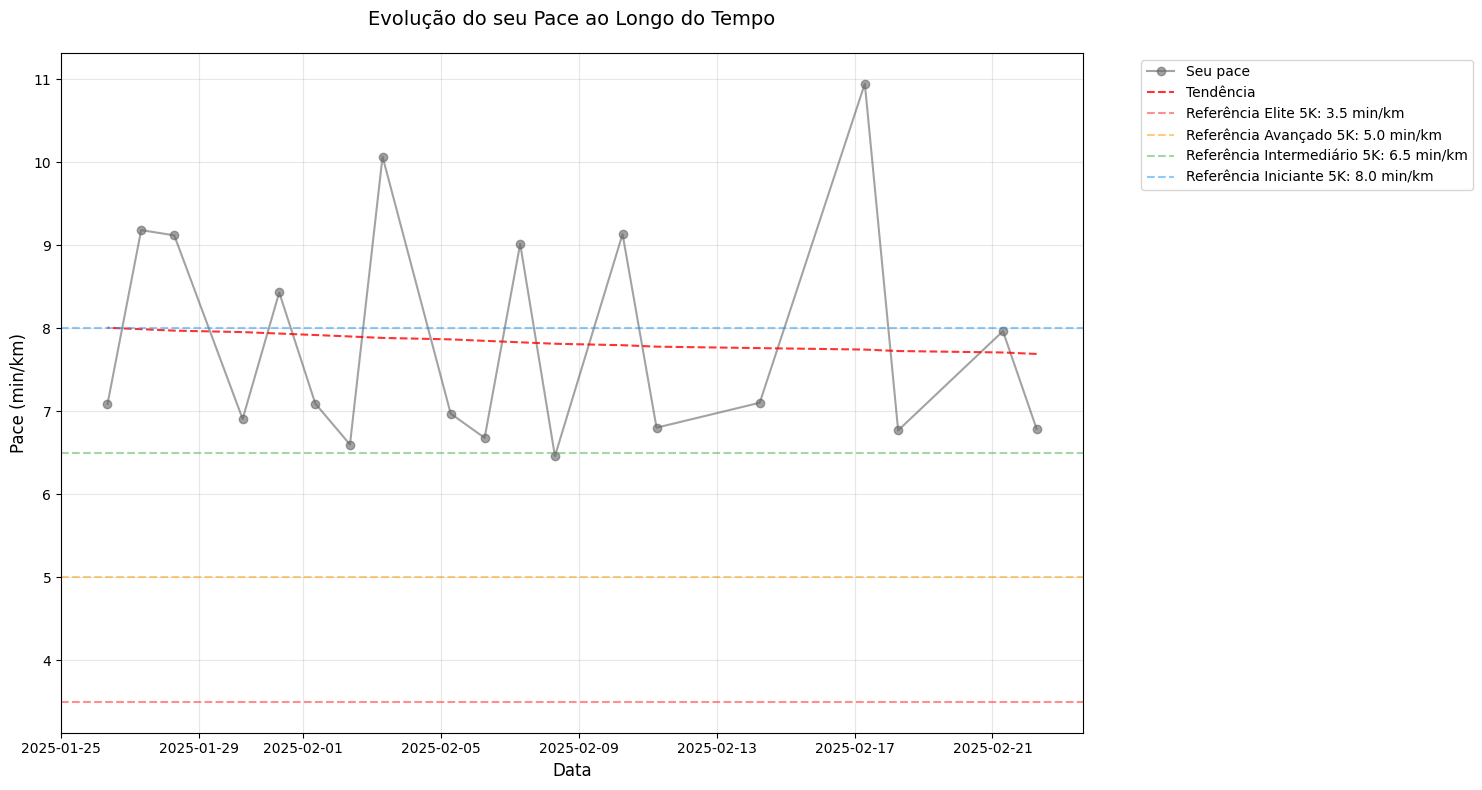

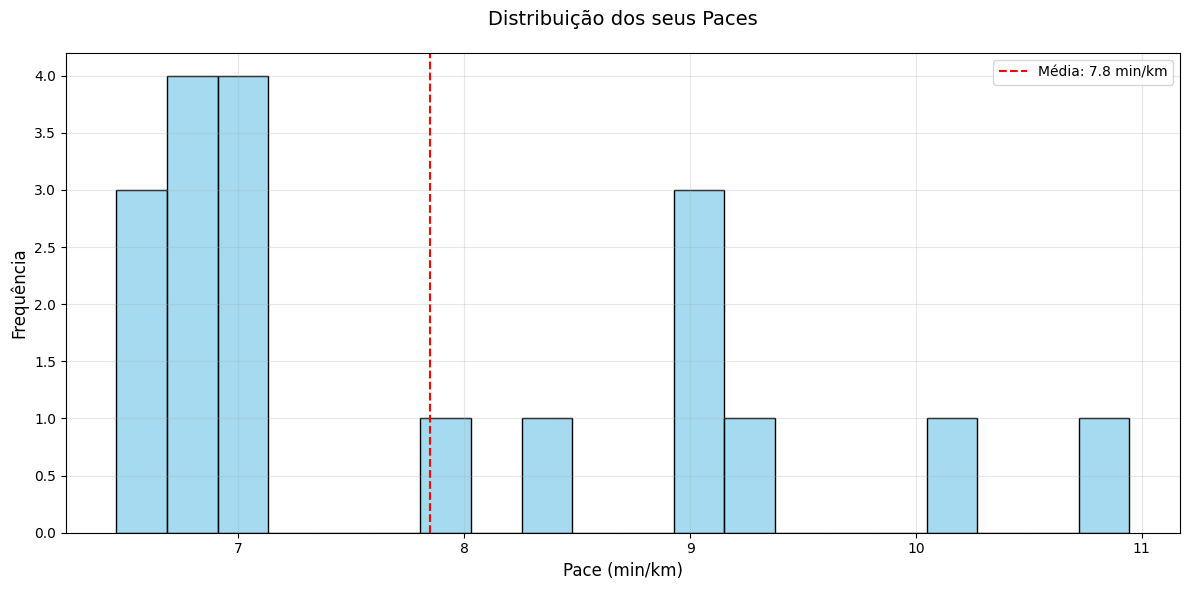

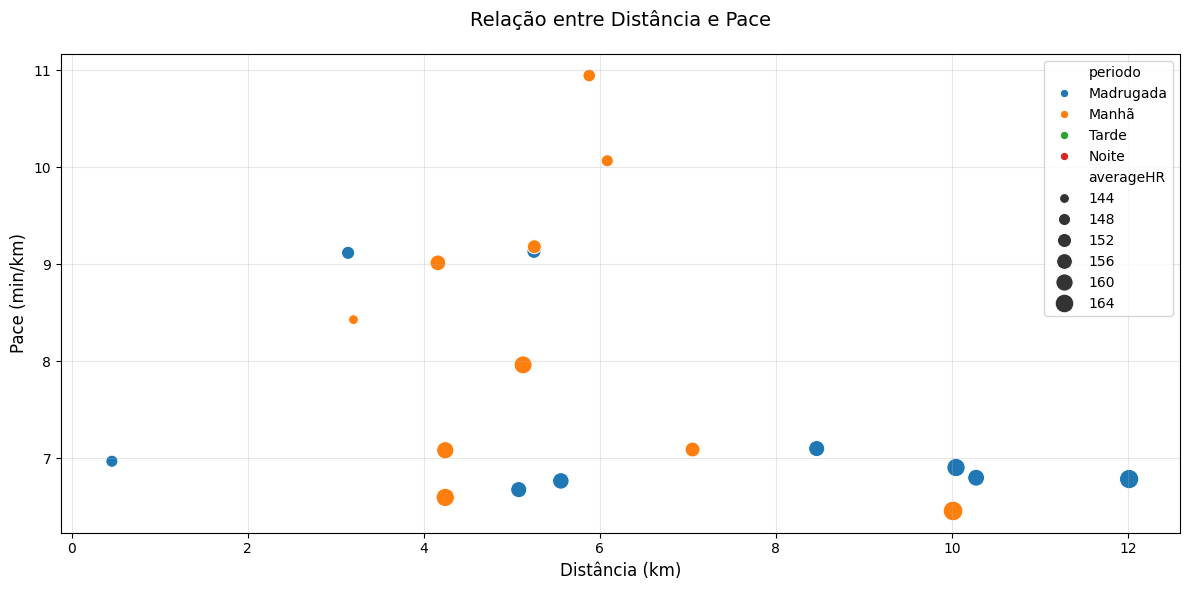

C:\Users\dirod\AppData\Local\Temp\ipykernel_3704\3242987672.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dia_semana', y='pace_min_km', palette='viridis')


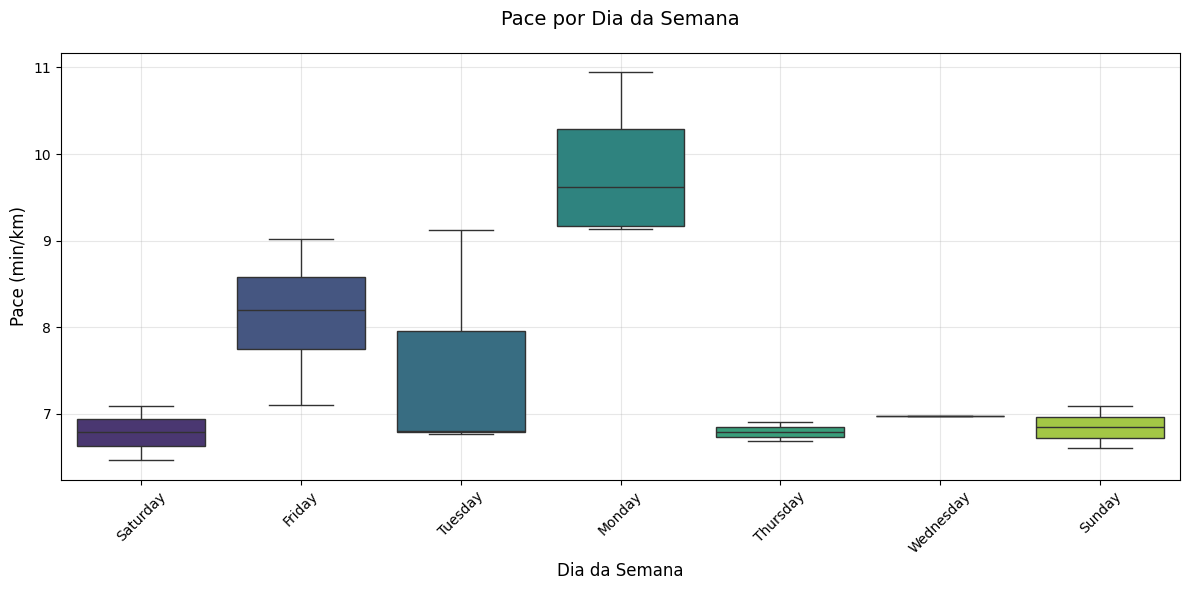

C:\Users\dirod\AppData\Local\Temp\ipykernel_3704\3242987672.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='periodo', y='pace_min_km', palette='viridis')


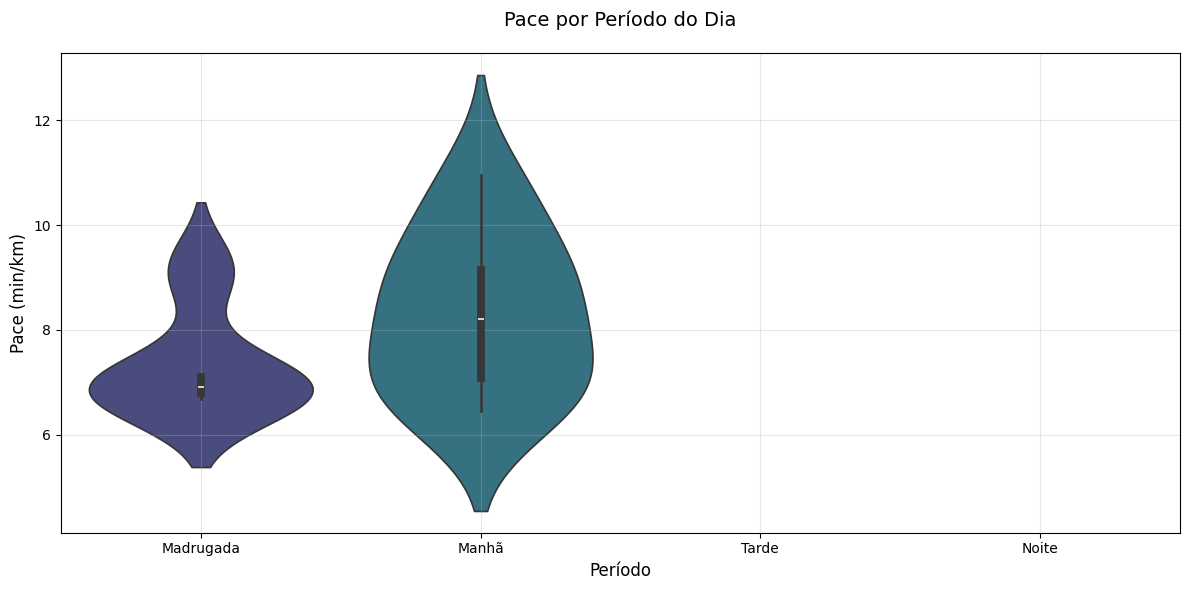

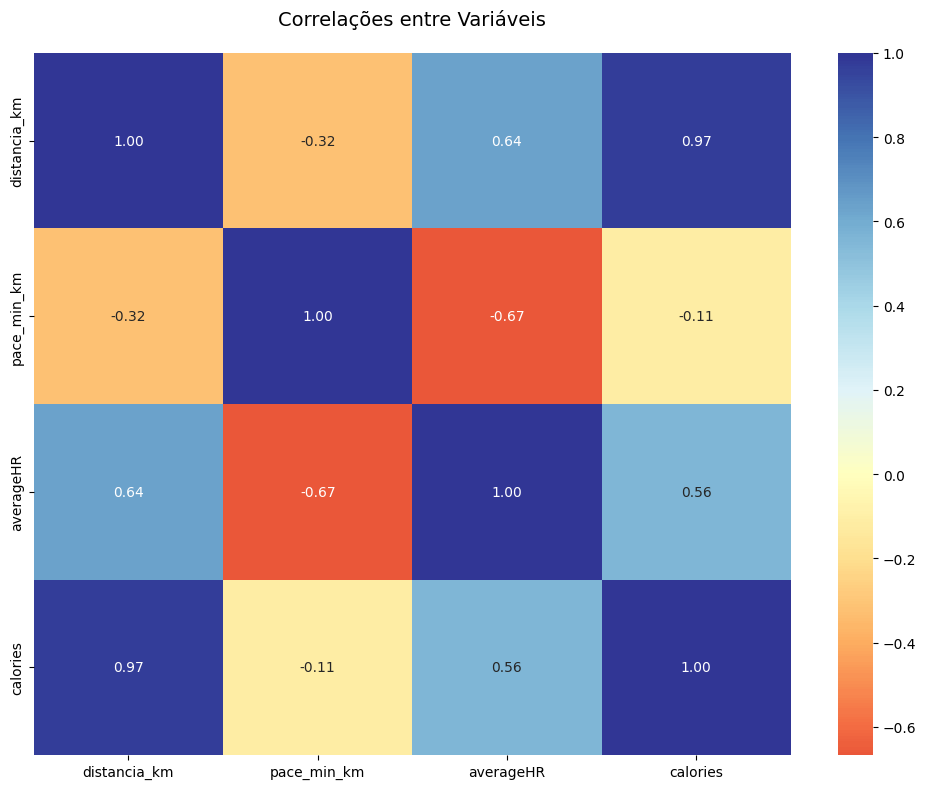

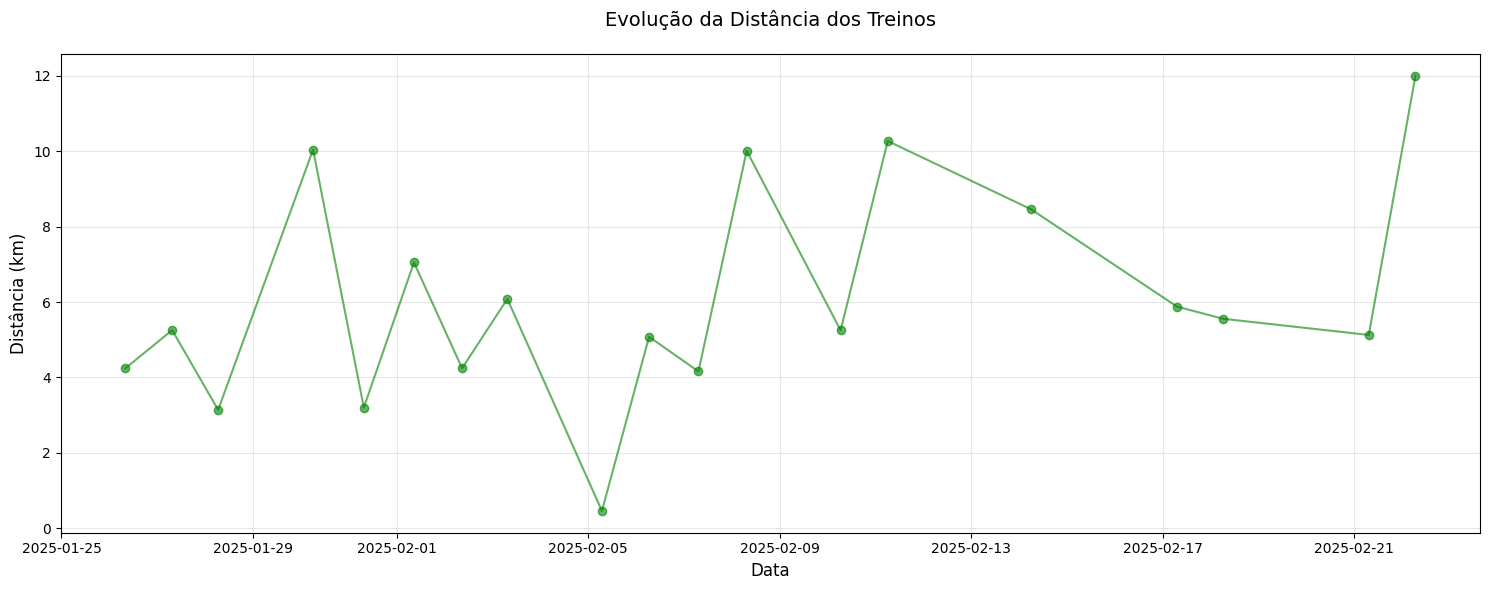

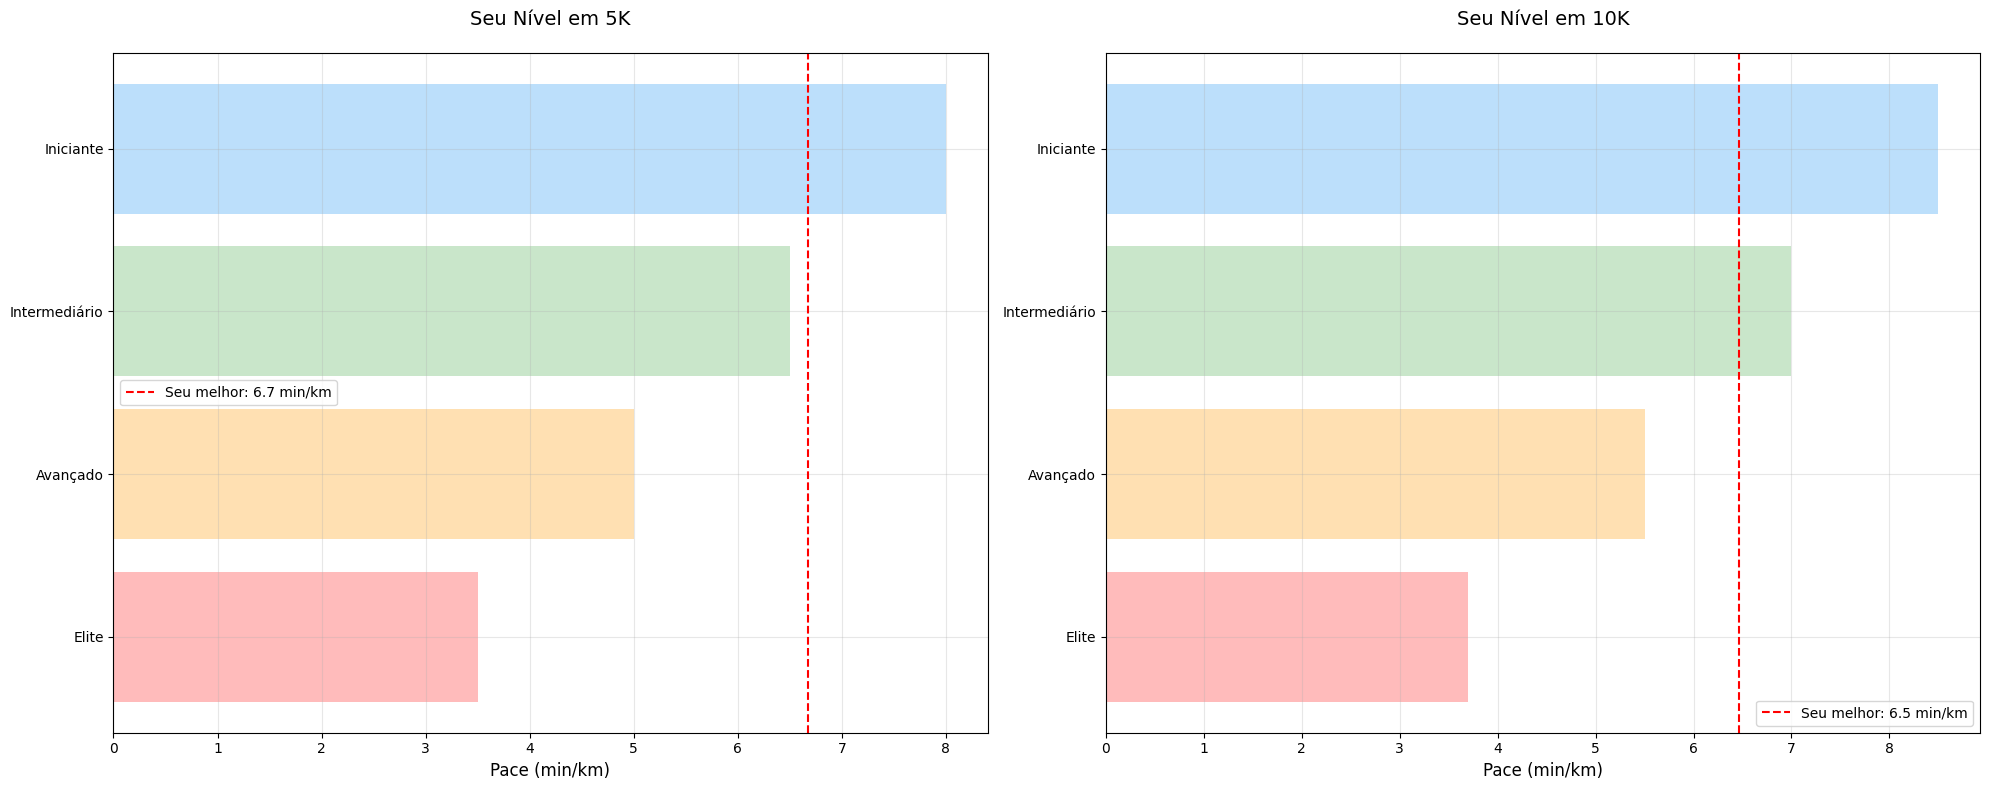

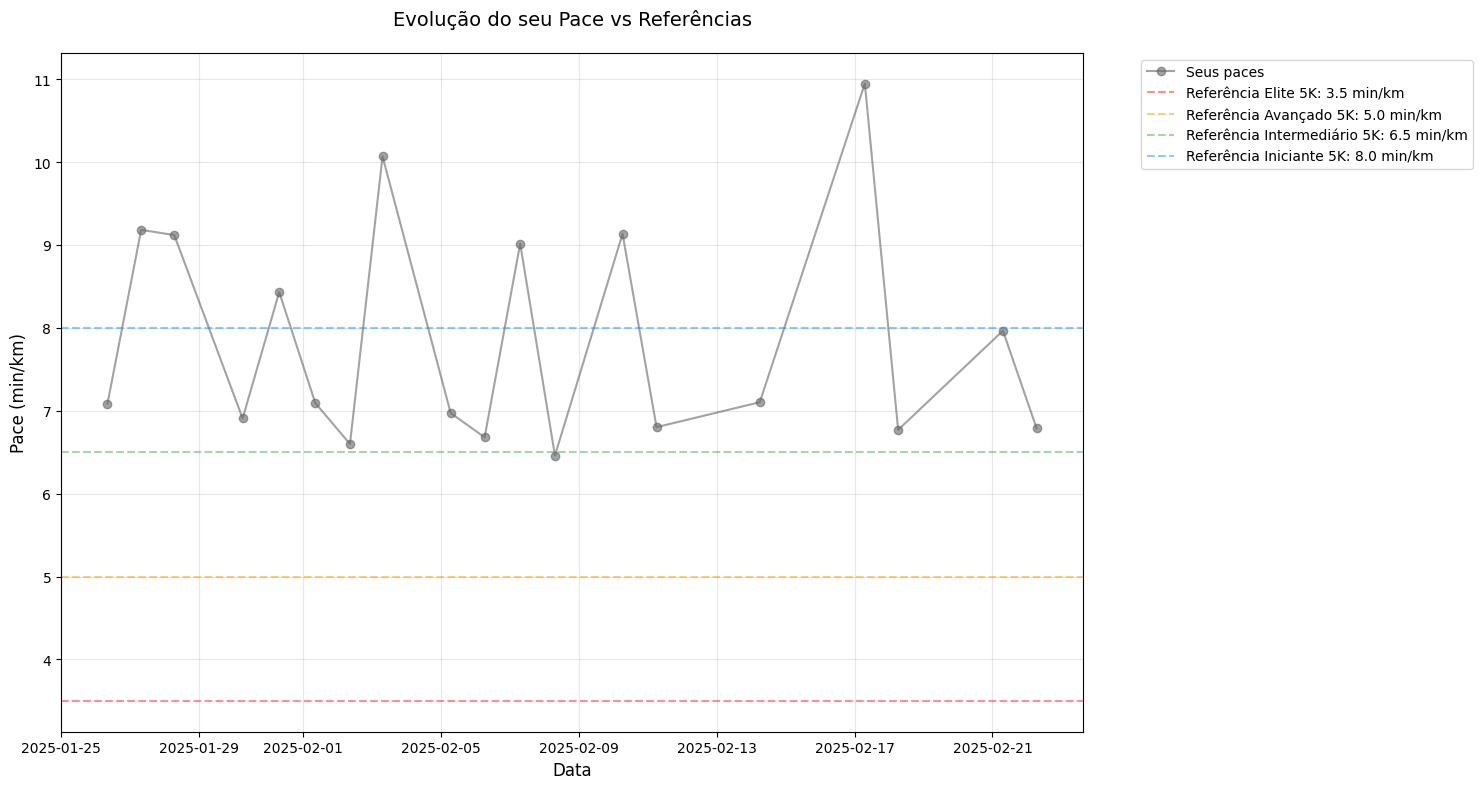

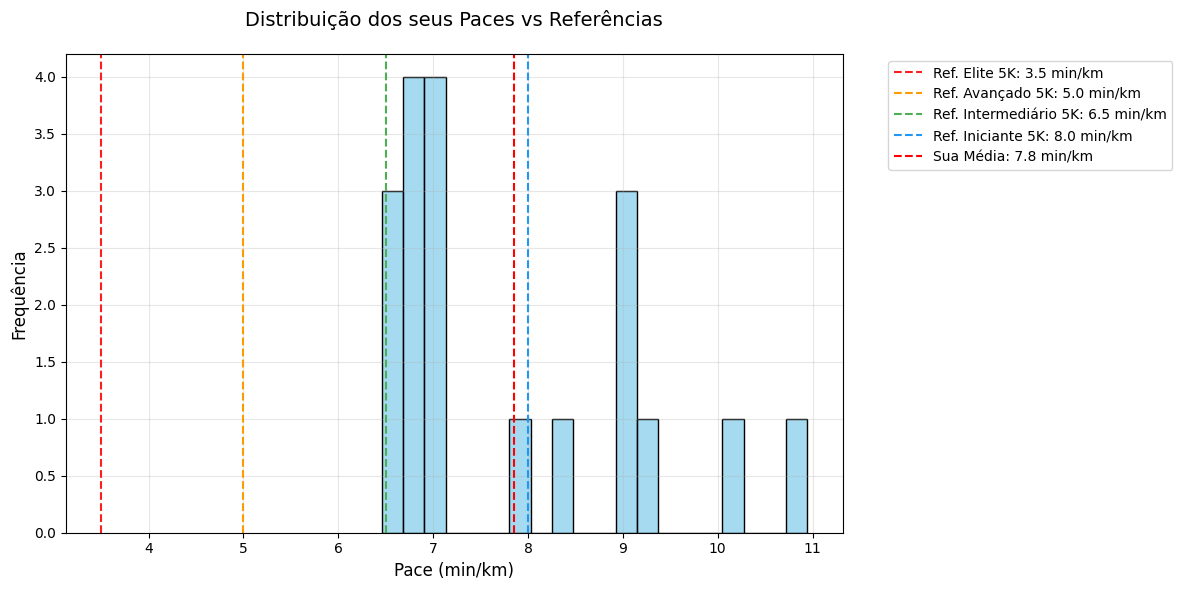


7. RECOMENDAÇÕES BASEADAS NOS DADOS

• Foco em Velocidade:
  - Inclua treinos intervalados 1-2x por semana
  - Faça um teste de 5K para avaliar progresso
  - Mantenha alguns treinos no pace atual para base

• Horários Ideais:
  - Priorize treinos no período da madrugada
  - Saturday apresenta seus melhores resultados

• Tipo de Treino:
  - Você tem melhor performance em distâncias maiores
  - Foque em treinos longos e progressivos
  - Inclua treinos específicos de velocidade para 5K

✅ Relatório detalhado salvo em 'analise_corridas_detalhada.txt'


In [17]:
def criar_visualizacoes(df):
    """Cria todas as visualizações da análise"""
    # Configurações gerais
    plt.style.use('default')
    
    # 1. Evolução do Pace com Tendência
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(df['startTimeLocal'], df['pace_min_km'], 'o-', 
            color='#666666', alpha=0.6, label='Seu pace')
    
    # Linha de tendência
    x = np.arange(len(df))
    z = np.polyfit(x, df['pace_min_km'], 1)
    p = np.poly1d(z)
    ax.plot(df['startTimeLocal'], p(x), '--', color='red', 
            alpha=0.8, label='Tendência')
    
    # Linhas de referência
    for nivel, pace in REFERENCIAS_PACE['5K'].items():
        ax.axhline(y=pace, linestyle='--', alpha=0.5,
                  color=CORES_REFERENCIAS[nivel],
                  label=f'Referência {nivel} 5K: {pace} min/km')
    
    ax.set_title('Evolução do seu Pace ao Longo do Tempo', fontsize=14, pad=20)
    ax.set_xlabel('Data', fontsize=12)
    ax.set_ylabel('Pace (min/km)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 2. Distribuição do Pace
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='pace_min_km', bins=20, color='skyblue')
    plt.axvline(df['pace_min_km'].mean(), color='red', linestyle='--', 
                label=f'Média: {df["pace_min_km"].mean():.1f} min/km')
    plt.title('Distribuição dos seus Paces', fontsize=14, pad=20)
    plt.xlabel('Pace (min/km)', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 3. Pace vs Distância
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='distancia_km', y='pace_min_km', 
                    hue='periodo', size='averageHR', sizes=(50, 200))
    plt.title('Relação entre Distância e Pace', fontsize=14, pad=20)
    plt.xlabel('Distância (km)', fontsize=12)
    plt.ylabel('Pace (min/km)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 4. Pace por Dia da Semana
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='dia_semana', y='pace_min_km', palette='viridis')
    plt.title('Pace por Dia da Semana', fontsize=14, pad=20)
    plt.xlabel('Dia da Semana', fontsize=12)
    plt.ylabel('Pace (min/km)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 5. Pace por Período do Dia
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=df, x='periodo', y='pace_min_km', palette='viridis')
    plt.title('Pace por Período do Dia', fontsize=14, pad=20)
    plt.xlabel('Período', fontsize=12)
    plt.ylabel('Pace (min/km)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 6. Mapa de Calor das Correlações
    plt.figure(figsize=(10, 8))
    correlacao = df[['distancia_km', 'pace_min_km', 'averageHR', 'calories']].corr()
    sns.heatmap(correlacao, annot=True, cmap='RdYlBu', center=0, fmt='.2f')
    plt.title('Correlações entre Variáveis', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

    # 7. Evolução da Distância
    plt.figure(figsize=(15, 6))
    plt.plot(df['startTimeLocal'], df['distancia_km'], 'o-', color='green', alpha=0.6)
    plt.title('Evolução da Distância dos Treinos', fontsize=14, pad=20)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Distância (km)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    
    plt.style.use('default')
    
    # 1. Comparação com Referências de Mulheres
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # 1.1 Gráfico para 5K
    corridas_5k = df[df['distancia_km'].between(4.5, 5.5)]
    if len(corridas_5k) > 0:
        melhor_5k = corridas_5k['pace_min_km'].min()
        niveis_5k = list(REFERENCIAS_PACE['5K'].items())
        
        # Plotar barras de referência
        y_pos = np.arange(len(niveis_5k))
        paces = [pace for nivel, pace in niveis_5k]
        
        ax1.barh(y_pos, paces, color=[CORES_REFERENCIAS[nivel] for nivel, _ in niveis_5k], alpha=0.3)
        ax1.axvline(x=melhor_5k, color='red', linestyle='--', 
                   label=f'Seu melhor: {melhor_5k:.1f} min/km')
        
        ax1.set_yticks(y_pos)
        ax1.set_yticklabels([nivel for nivel, _ in niveis_5k])
        ax1.set_title('Seu Nível em 5K', fontsize=14, pad=20)
        ax1.set_xlabel('Pace (min/km)', fontsize=12)
        ax1.grid(True, alpha=0.3)
        ax1.legend()

    # 1.2 Gráfico para 10K
    corridas_10k = df[df['distancia_km'].between(9.5, 10.5)]
    if len(corridas_10k) > 0:
        melhor_10k = corridas_10k['pace_min_km'].min()
        niveis_10k = list(REFERENCIAS_PACE['10K'].items())
        
        y_pos = np.arange(len(niveis_10k))
        paces = [pace for nivel, pace in niveis_10k]
        
        ax2.barh(y_pos, paces, color=[CORES_REFERENCIAS[nivel] for nivel, _ in niveis_10k], alpha=0.3)
        ax2.axvline(x=melhor_10k, color='red', linestyle='--', 
                    label=f'Seu melhor: {melhor_10k:.1f} min/km')
        
        ax2.set_yticks(y_pos)
        ax2.set_yticklabels([nivel for nivel, _ in niveis_10k])
        ax2.set_title('Seu Nível em 10K', fontsize=14, pad=20)
        ax2.set_xlabel('Pace (min/km)', fontsize=12)
        ax2.grid(True, alpha=0.3)
        ax2.legend()
    
    plt.tight_layout()
    plt.show()

    # 2. Evolução do Pace com Referências
    plt.figure(figsize=(15, 8))
    plt.plot(df['startTimeLocal'], df['pace_min_km'], 'o-', 
            color='#666666', alpha=0.6, label='Seus paces')
    
    # Adicionar linhas de referência para 5K
    for nivel, pace in REFERENCIAS_PACE['5K'].items():
        plt.axhline(y=pace, linestyle='--', alpha=0.5,
                   color=CORES_REFERENCIAS[nivel],
                   label=f'Referência {nivel} 5K: {pace} min/km')
    
    plt.title('Evolução do seu Pace vs Referências', fontsize=14, pad=20)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Pace (min/km)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 3. Distribuição do Pace com Zonas
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='pace_min_km', bins=20, color='skyblue')
    
    # Adicionar linhas de referência
    for nivel, pace in REFERENCIAS_PACE['5K'].items():
        plt.axvline(x=pace, color=CORES_REFERENCIAS[nivel], linestyle='--', 
                   label=f'Ref. {nivel} 5K: {pace} min/km')
    
    plt.axvline(df['pace_min_km'].mean(), color='red', linestyle='--', 
                label=f'Sua Média: {df["pace_min_km"].mean():.1f} min/km')
    
    plt.title('Distribuição dos seus Paces vs Referências', fontsize=14, pad=20)
    plt.xlabel('Pace (min/km)', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # ... (resto das visualizações anteriores) ...

df = analisar_corridas()